In [211]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

In [182]:
def multi_normal(x: np.ndarray, mu: np.ndarray, Sigma: np.ndarray, d: int) -> np.ndarray:
    a = 1/np.sqrt(np.power(2*np.pi, d)*np.linalg.det(Sigma))
    b = np.linalg.solve(np.linalg.inv(Sigma), (x-mu)).T.dot(x-mu)
    return a * np.exp(-b/2)

In [205]:
def generate_surface(mu: np.ndarray, Sigma: np.ndarray, d: int) -> np.ndarray:
    x_1 = np.linspace(-1, 1, num=100).reshape(-1, 1)
    x_2 = np.linspace(-1, 1, num=100).reshape(-1, 1)
    x_1, x_2 = np.meshgrid(x_1, x_2)
    pdf = np.zeros((100, 100))
    
    for i in range(100):
        for j in range(100):
            x = np.array([x_1[i, j], x_2[i, j]])
            a = multi_normal(x, mu, Sigma, d)
            pdf[i, j] = a
    return x_1, x_2, pdf

In [213]:
d = 2
# mu = np.array([2, 1])
# Sigma = np.array([[0.7068966, 0.5172414], [0.5172414, 1.7931034]])
mu = np.array([0, 0])
Sigma = np.array([[1, 0], [0, 1]])

In [214]:
x_1, x_2, pdf = generate_surface(mu, Sigma, d)

In [215]:
print(pdf)

[[0.05854983 0.05973249 0.06091418 ... 0.06091418 0.05973249 0.05854983]
 [0.05973249 0.06093905 0.0621446  ... 0.0621446  0.06093905 0.05973249]
 [0.06091418 0.0621446  0.06337401 ... 0.06337401 0.0621446  0.06091418]
 ...
 [0.06091418 0.0621446  0.06337401 ... 0.06337401 0.0621446  0.06091418]
 [0.05973249 0.06093905 0.0621446  ... 0.0621446  0.06093905 0.05973249]
 [0.05854983 0.05973249 0.06091418 ... 0.06091418 0.05973249 0.05854983]]


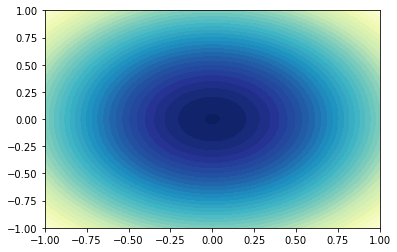

In [216]:
plt.contourf(x_1, x_2, pdf, 33, cmap=cm.YlGnBu)